# Support Vector Machine (SVM) Classification

## Introduction
In this notebook, we'll explore Support Vector Machine (SVM) classification, a powerful machine learning algorithm used for both linear and non-linear classification tasks. We'll use the SVM implementation from the sklearn library to classify two sets of data.



## Before you begin

Remember to:

1. Make your own copy of the notebook by pressing the "Copy to drive" button.
2. Expend all cells by pressing **Ctrl+[**

### Your IDs

✍️ Fill in your IDs in the cell below:

In [ ]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Fill in your IDs (as a string)
student1_id = '...'
student2_id = '...'
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print('Hello ' + student1_id + ' & ' + student2_id)

Hello ... & ...


## Importing Required Libraries
First, we need to import the necessary Python libraries. These libraries will help us load and manipulate data, perform mathematical operations, create visualizations, and implement the SVM algorithm.

Run the cell below to import the required modules:

In [ ]:
#Load Modules
from pandas import read_csv
import pandas as pd
from time import sleep
from numpy import ones, zeros, append, linspace, reshape, mean ,std, sum, array, dot,concatenate, split, trace
from numpy.random import rand
from pylab import plot, scatter, xlabel, ylabel, contour,figure, show, axes, imshow
from scipy.optimize import fmin_bfgs, fmin_cg
from sklearn.svm import SVC
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##Using the Dataset and Preprocessing

Notice that the data is sourced from a GitHub repository, which provides the dataset needed for this exercise.



We will prepare the data for SVM classification. We're using a dataset of images, where each image is represented as a 20x20 array of grayscale intensities.

### Important Note:
In the following cell we will populate the interactive namespace with functions from numpy and matplotlib. This allows us to use these functions without explicitly calling the module names.

Now, let's load our data:

In [ ]:
#Here we import the images which are separated in a gray scale intensity in a 20x20 array
import scipy.io
import numpy as np
import requests
from io import BytesIO

# URL of the raw data file on GitHub
url = "https://raw.githubusercontent.com/rragundez/coursera-machine-learning-AndrewNg-Python/master/data/data5a.mat"

# Download the file
response = requests.get(url)
file_content = BytesIO(response.content)

# Load the data
dataA = scipy.io.loadmat(file_content)
data = np.append(dataA['X'], dataA['y'], axis=1)

print('We observed the first 5 examples')
print(data[:5])

We observed the first 5 examples
[[1.9643 4.5957 1.    ]
 [2.2753 3.8589 1.    ]
 [2.9781 4.5651 1.    ]
 [2.932  3.5519 1.    ]
 [3.5772 2.856  1.    ]]


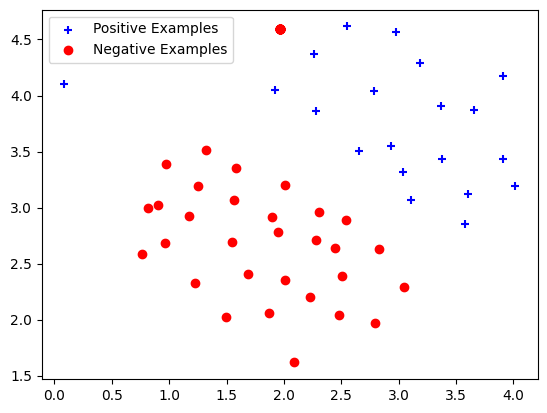

In [ ]:
#Pass the data into a matrix and plot it
#Notice that we need the 'scatter' function to visually display the relationship between two variables in a dataset,
#helping us identify patterns, trends, and outliers.
x = dataA['X']
y = dataA['y']
pos = where(y == 1)
neg = where(y == 0)

scatter(x[pos,0],x[pos,1], marker = '+', c='b')
scatter(x[neg,0],x[neg,1], marker = 'o', c='r')
legend(['Positive Examples','Negative Examples'])

# Exercise Overview
In this task, you are asked to complete the initialization of the SVC classifier based on the specified kernel and to plot the decision boundary for linear kernels. This will help you understand how to set up and visualize Support Vector Classification (SVC) models and how different configurations affect the decision boundary.

In [ ]:
# This function applies SVC and plots the decision boundary.

def fitAndPlot(c, ker, x, y):
    # Initialize the SVC classifier

    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    if ker == 'rbf':
        clf = SVC()  # Default initialization for RBF kernel
    else:
        clf = SVC(kernel=ker, C=c)  # Initialize with specified kernel and C
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

    # Ensure y is a 1D array
    y.shape = (y.shape[0],)

    # Fit the classifier to the data
    clf.fit(x, y)

    # Compute and plot the decision boundary for linear kernels
    if ker != 'rbf':
        w = clf.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(0, 5)
        yy = a * xx - clf.intercept_[0] / w[1]

        # Plot the decision boundary
        ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
        h0 = plt.plot(xx, yy, 'k-', label="Decision Boundary")
        ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

    # Plot positive and negative examples
    pos = np.where(y == 1)  # Positive examples
    neg = np.where(y == 0)  # Negative examples

    scatter(x[pos, 0], x[pos, 1], marker='+', c='b', label='Positive Examples')
    scatter(x[neg, 0], x[neg, 1], marker='o', c='r', label='Negative Examples')

    # Add a legend to the plot
    legend(['Positive Examples', 'Negative Examples'])


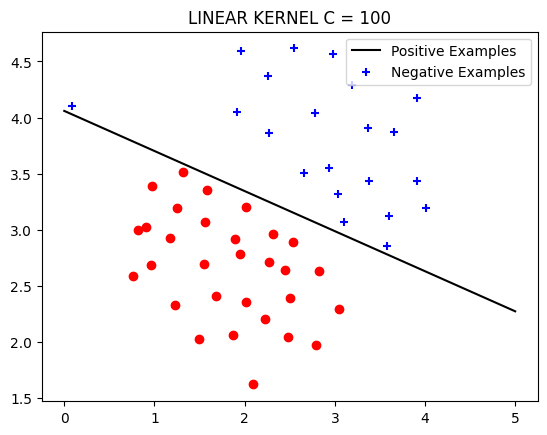

We observe that for big C it tries to get all the examples in one side and the other, using the closest ones to the line as support vectors
With big C we end up in a High Variance situation
A more relaxed C fits more appropriately


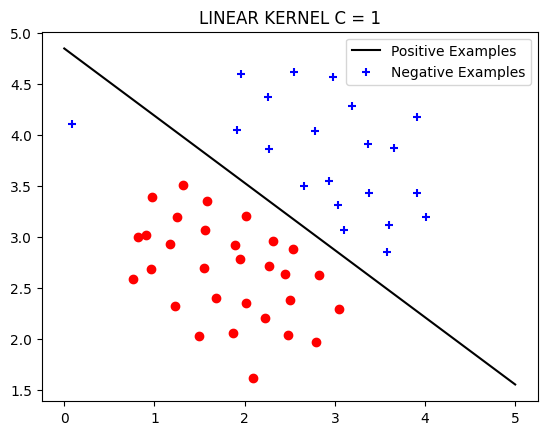

In [ ]:
#Here we use a linear Kernel and observe the influence of C
kernel = 'linear'
C=100
fitAndPlot(C,kernel,x,y)
title('LINEAR KERNEL C = %d'%C)
show()
C = 1
fitAndPlot(C,kernel,x,y)
title('LINEAR KERNEL C = %d'%C)

print('We observe that for big C it tries to get all the examples in one side and the other, using the closest ones to the line as support vectors')
print('With big C we end up in a High Variance situation')
print('A more relaxed C fits more appropriately')

In our previous analysis, we observed that with a large value of the hyperparameter C, the SVM model tightly fits the decision boundary around the training examples. This often results in a high variance situation, where the model overfits by placing most examples on one side of the boundary, making it less generalizable to new data. On the other hand, using a more relaxed value of
C leads to a smoother decision boundary. This approach fits the data more appropriately and reduces the risk of overfitting, which generally improves the model's performance on unseen data.





# Applying RBF (Radius Basis Function) Kernel SVM to a new data
You will load a dataset (notice its data5b now), visualize the data using scatter plots, and apply an SVM classifier with an RBF kernel. This will involve plotting the decision boundary to see how the classifier separates different classes and evaluating the model's accuracy.

In [ ]:
import scipy.io
# URL of the raw data file on GitHub
url = "https://raw.githubusercontent.com/rragundez/coursera-machine-learning-AndrewNg-Python/master/data/data5b.mat"

# Download the file
response = requests.get(url)
file_content = BytesIO(response.content)

# Load the data
dataA = scipy.io.loadmat(file_content)
data = np.append(dataA['X'], dataA['y'], axis=1)

print(data[:5])

x = dataA['X']
y = dataA['y']

[[0.107143  0.60307   1.       ]
 [0.093318  0.649854  1.       ]
 [0.0979263 0.705409  1.       ]
 [0.15553   0.784357  1.       ]
 [0.210829  0.866228  1.       ]]


Examples are not easily separated; we need to use a non-linear kernel.


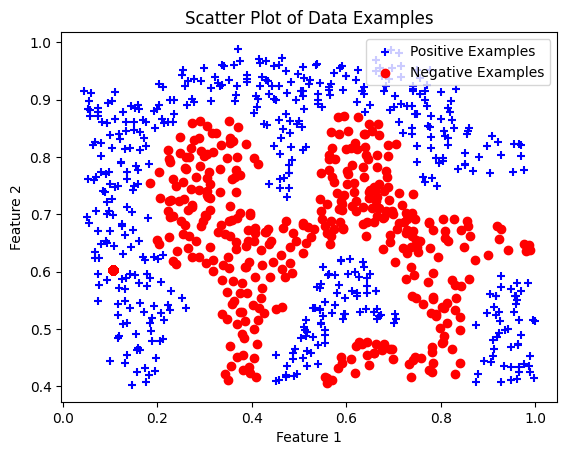

In [ ]:
# Plot Data

# Identify indices of positive and negative examples
pos = np.where(y == 1)  # Indices of positive examples
neg = np.where(y == 0)  # Indices of negative examples

# Plot positive examples using blue '+' markers
plt.scatter(x[pos, 0], x[pos, 1], marker='+', c='b', label='Positive Examples')

# Plot negative examples using red 'o' markers
plt.scatter(x[neg, 0], x[neg, 1], marker='o', c='r', label='Negative Examples')

# Add legend to the plot
plt.legend()

# Display the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Data Examples')

# Print a message indicating the need for a non-linear kernel
print('Examples are not easily separated; we need to use a non-linear kernel.')

**Your goal is to correctly implement the decision function calculation and scatter plot visualization to visualize the decision boundary and evaluate the model's performance.**

Using a Radius Basis Function "RBF" kernel with Gamma = 100 helps to control the shape of the decision boundary.
A low Gamma results in a more circular boundary, while a high Gamma allows for a more flexible boundary.
The accuracy of the classifier on the dataset is 99.77%


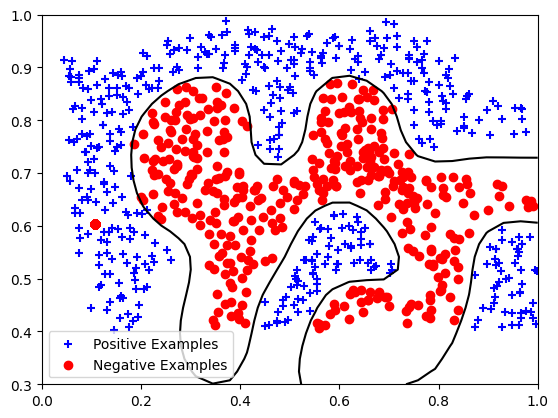

In [ ]:
from sklearn.svm import SVC
from numpy import linspace, meshgrid, zeros_like
import matplotlib.pyplot as plt

# Function to plot the decision boundary of a classifier
def boarderCurve(clf, ax=None):
    if ax is None:
        ax = plt.gca()

    # Define grid for plotting decision boundaries
    x = linspace(0, 1, 30)
    y = linspace(0.3, 1, 30)
    Y, X = meshgrid(y, x)
    P = zeros_like(X)

    # Compute decision function values over the grid
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
              ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
              ## Calculate the decision function value for each point (xi, yj)
              decision_value = clf.decision_function([[xi, yj]])
              P[i, j] = decision_value[0]
              ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

    # Plot the decision boundary where the decision function is zero
    ax.contour(X, Y, P, levels=[0], colors='k', linestyles=['-'])

# Initialize and train the SVM classifier
gam = 100
clf = SVC(kernel='rbf', gamma=gam)
clf.fit(x, y.flatten())

## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Plot positive and negative class examples on the scatter plot using scatter function
scatter(x[pos, 0], x[pos, 1], marker='+', c='b', label='Positive Examples')
scatter(x[neg, 0], x[neg, 1], marker='o', c='r', label='Negative Examples')
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

legend()
boarderCurve(clf)

# Calculate and display the accuracy of the classifier
acc = clf.score(x, y) * 100

print('Using a Radius Basis Function "RBF" kernel with Gamma = {} helps to control the shape of the decision boundary.'.format(gam))
print('A low Gamma results in a more circular boundary, while a high Gamma allows for a more flexible boundary.')
print(f'The accuracy of the classifier on the dataset is {acc:.2f}%')


#Conclusion
In this exercise, we explored Support Vector Machines (SVMs) for classification.
We learned that SVMs work by finding the optimal decision boundary that maximizes the margin between classes, with support vectors being the key data points that define this boundary.

The hyperparameter C plays a crucial role in controlling the trade-off between training error and model complexity. A high C can lead to overfitting, whereas a lower C generally promotes better generalization. We also used the RBF kernel to handle non-linearly separable data, demonstrating how kernels can transform feature spaces to improve classification.

Evaluating the SVM's performance involves examining the decision boundary and calculating accuracy, which are essential for understanding how well the model performs.

**Tune C and kernels** to balance model complexity and generalization.
Adjusting C helps manage the trade-off between fitting the training data and avoiding overfitting, while choosing the right kernel can transform feature spaces for better classification.

**Support vectors** are crucial as they define the decision boundary and significantly influence the model's performance.